In [30]:
%matplotlib qt
#notebook backend important
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os.path
import cv2
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import askopenfilenames
import matplotlib.animation as animation
from scipy import signal 

In [22]:
run=13

In [3]:
#getting background data

background_path = askopenfilename() 
data=np.load(background_path)
gamma = data['gamma']
beta = data['beta']

#making a directory to save data
os.mkdir('{}/densityfields'.format(os.path.dirname(background_path)))

In [4]:
#now choose background image

background_path = askopenfilename() 
b_image = cv2.imread(background_path,0)

In [5]:
#selecting upper and lower limits

plt.figure()
plt.title('Background Image')
plt.imshow(b_image, cmap='gist_gray')
print('Select the top then the bottom portion of the region you want to analyse')
crop_region = plt.ginput(2) #select the left then the right 
print('Locations recorded')

back_crop= b_image[int(crop_region[0][1]):int(crop_region[1][1]),int(crop_region[0][0]):int(crop_region[1][0])]

Select the top then the bottom portion of the region you want to analyse
Locations recorded


In [43]:
#now choose the pictures you want to look over
foreground_path = askopenfilenames()
no_images = len(foreground_path)

#f_image = cv2.imread(foreground_path[0],0)

In [8]:
plt.figure()
plt.title('Background Image')
plt.imshow(back_crop, cmap='gist_gray')

In [34]:
%matplotlib inline  

C:\Users\u6201343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\u6201343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


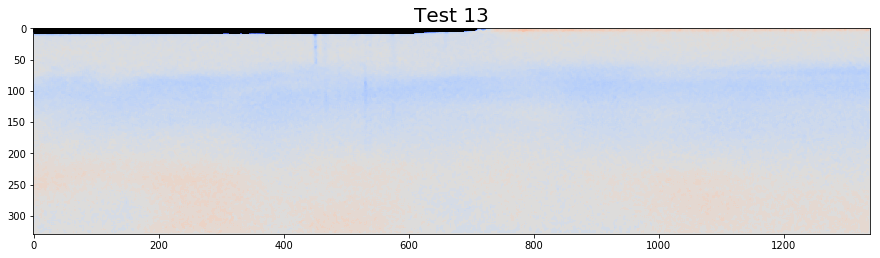

In [44]:
ims=[]

fig = plt.figure(figsize=(15,8))
cmap = matplotlib.cm.coolwarm
cmap.set_under(color='black')
    
for i in range(no_images):
    f_image = cv2.imread(foreground_path[i],0)
    f_image_crop=f_image[int(crop_region[0][1]):int(crop_region[1][1]),int(crop_region[0][0]):int(crop_region[1][0])]
    ratio =f_image_crop/back_crop
    log_ratio = np.log(ratio)

    #getting rid of unwated inf_values
    log_ratio[np.isinf(log_ratio)]=np.nan
    
    
    log_filt=signal.medfilt2d(log_ratio,5)
    
    log_filt=np.where(log_filt<-0.5,np.nan,log_filt)
 
   
    
    plt.title('Test {}'.format(run), fontsize=20)
    im=plt.imshow(log_filt, cmap=cmap, vmin=-.3, vmax=.3, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=125, blit=True,
                                repeat_delay=1000)

ani.save('{}/densityfields/run_{}.mp4'.format(os.path.dirname(background_path),run))
